# Task 2: Paddy Variety Classification
Train & Compare CNN vs MobileNetV2 - S3921846 - Nguyen Dai Thanh

In [17]:

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Paths
train_dir = '../data/train_images_cleaned/train'
val_dir   = '../data/train_images_cleaned/val'
IMG_SIZE = (224, 224)
BATCH_SIZE = 32


In [18]:

# CNN Data Generator
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
val_gen = datagen.flow_from_directory(val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')


Found 8323 images belonging to 10 classes.
Found 2084 images belonging to 10 classes.


In [19]:

# CNN Model
cnn_model = Sequential([
    Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(train_gen.num_classes, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,250 (42.61 MB)

 Trainable params: 11,170,250 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
cnn_history = cnn_model.fit(train_gen, validation_data=val_gen, epochs=15, callbacks=[early_stop])
cnn_model.save("../models/model_task2_cnn.keras")


Epoch 1/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 84s 318ms/step - accuracy: 0.2379 - loss: 2.3247 - val_accuracy: 0.4539 - val_loss: 1.5902
Epoch 2/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 87s 334ms/step - accuracy: 0.4904 - loss: 1.5119 - val_accuracy: 0.5873 - val_loss: 1.2435
Epoch 3/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 86s 328ms/step - accuracy: 0.6582 - loss: 1.0350 - val_accuracy: 0.6867 - val_loss: 0.9984
Epoch 4/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 87s 334ms/step - accuracy: 0.7958 - loss: 0.6147 - val_accuracy: 0.7380 - val_loss: 0.8845
Epoch 5/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 91s 348ms/step - accuracy: 0.8763 - loss: 0.3678 - val_accuracy: 0.7726 - val_loss: 0.8495
Epoch 6/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 97s 369ms/step - accuracy: 0.9158 - loss: 0.2413 - val_accuracy: 0.7845 - val_loss: 0.9002
Epoch 7/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 90s 344ms/step - accuracy: 0.9473 - loss: 0.1635 - val_accuracy: 0.7946 - val_loss: 0.8901


In [14]:

# MobileNetV2 Data Generator
mobilenet_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen_m = mobilenet_datagen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
val_gen_m = mobilenet_datagen.flow_from_directory(val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')


Found 8323 images belonging to 10 classes.
Found 2084 images belonging to 10 classes.


In [22]:

# MobileNetV2 Model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_gen_m.num_classes, activation='softmax')(x)

mobilenet_model = Model(inputs=base_model.input, outputs=output)

for layer in base_model.layers:
    layer.trainable = False

mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mobilenet_model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [23]:

early_stop_m = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
mobilenet_history = mobilenet_model.fit(train_gen_m, validation_data=val_gen_m, epochs=15, callbacks=[early_stop_m])
mobilenet_model.save("../models/model_task2_mobilenetv2.keras")


Epoch 1/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 84s 310ms/step - accuracy: 0.4140 - loss: 1.7343 - val_accuracy: 0.6536 - val_loss: 1.0663
Epoch 2/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 80s 306ms/step - accuracy: 0.6436 - loss: 1.0744 - val_accuracy: 0.7202 - val_loss: 0.8677
Epoch 3/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 82s 316ms/step - accuracy: 0.7268 - loss: 0.8556 - val_accuracy: 0.7126 - val_loss: 0.8729
Epoch 4/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 77s 297ms/step - accuracy: 0.7628 - loss: 0.7351 - val_accuracy: 0.7884 - val_loss: 0.6890
Epoch 5/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 80s 305ms/step - accuracy: 0.7785 - loss: 0.6676 - val_accuracy: 0.7941 - val_loss: 0.6522
Epoch 6/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 87s 334ms/step - accuracy: 0.8133 - loss: 0.5788 - val_accuracy: 0.8138 - val_loss: 0.5921
Epoch 7/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 78s 300ms/step - accuracy: 0.8355 - loss: 0.5086 - val_accuracy: 0.8076 - val_loss: 0.6006
Epoch 8/15
261/261 ━━━━━━━━━━━━━━━━━━━━ 84s 320ms/step - accuracy: 0.8443 - loss: 0

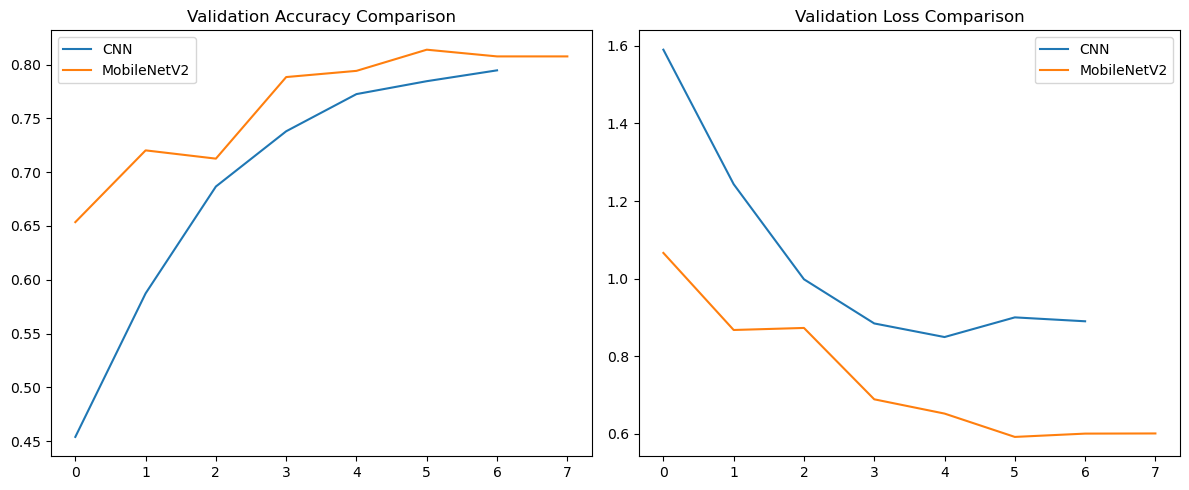

In [24]:

# Plot comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['val_accuracy'], label='CNN')
plt.plot(mobilenet_history.history['val_accuracy'], label='MobileNetV2')
plt.title("Validation Accuracy Comparison")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['val_loss'], label='CNN')
plt.plot(mobilenet_history.history['val_loss'], label='MobileNetV2')
plt.title("Validation Loss Comparison")
plt.legend()

plt.tight_layout()
plt.show()
